<a href="https://colab.research.google.com/github/De78-cyber/jubilant-octo-robot/blob/main/Desafio_Cria%C3%A7%C3%A3o_de_uma_Base_de_Dados_e_Treinamento_da_Rede_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Baixar as imagens de validação
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d ./coco

# Baixar as anotações
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./coco


A saída de streaming foi truncada nas últimas 5000 linhas.
 extracting: ./coco/val2017/000000577584.jpg  
 extracting: ./coco/val2017/000000346905.jpg  
 extracting: ./coco/val2017/000000433980.jpg  
 extracting: ./coco/val2017/000000228144.jpg  
 extracting: ./coco/val2017/000000041872.jpg  
 extracting: ./coco/val2017/000000117492.jpg  
 extracting: ./coco/val2017/000000368900.jpg  
 extracting: ./coco/val2017/000000376900.jpg  
 extracting: ./coco/val2017/000000352491.jpg  
 extracting: ./coco/val2017/000000330790.jpg  
 extracting: ./coco/val2017/000000384850.jpg  
 extracting: ./coco/val2017/000000032735.jpg  
 extracting: ./coco/val2017/000000197004.jpg  
 extracting: ./coco/val2017/000000526751.jpg  
 extracting: ./coco/val2017/000000041488.jpg  
 extracting: ./coco/val2017/000000153632.jpg  
 extracting: ./coco/val2017/000000501523.jpg  
 extracting: ./coco/val2017/000000405691.jpg  
 extracting: ./coco/val2017/000000040757.jpg  
 extracting: ./coco/val2017/000000219485.jpg  
 

--2025-01-23 17:37:08--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.44.65, 54.231.233.25, 3.5.30.77, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.44.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip.10’

val2017.zip.10      100%[===================>] 777.80M  65.7MB/s    in 12s     

2025-01-23 17:37:20 (63.8 MB/s) - ‘val2017.zip.10’ saved [815585330/815585330]

Archive:  val2017.zip
replace ./coco/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2025-01-23 17:37:46--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.193.41, 52.217.90.76, 52.217.207.1, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.193.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Leng

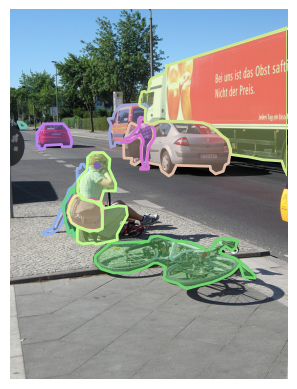

In [ ]:
# Importar bibliotecas necessárias
import os
import json
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Baixar e descompactar as imagens de validação
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d ./coco

# Baixar e descompactar as anotações
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./coco

# Definir o caminho das anotações e do subconjunto
dataDir = './coco'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'
coco = COCO(annFile)

# Função para baixar, visualizar e rotular imagens
def process_coco_image(coco, dataDir, dataType):
    # Carregar IDs de imagens com categorias específicas
    catIds = coco.getCatIds(catNms=['person', 'car'])
    imgIds = coco.getImgIds(catIds=catIds)
    img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

    # Baixar a imagem
    img_data = requests.get(img['coco_url']).content
    with open(f"{dataDir}/{dataType}/{img['file_name']}", 'wb') as handler:
        handler.write(img_data)

    # Ler a imagem
    image = cv2.imread(f"{dataDir}/{dataType}/{img['file_name']}")

    # Obter as anotações da imagem
    annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Desenhar as caixas delimitadoras na imagem
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    coco.showAnns(anns)
    plt.show()

# Processar e visualizar uma imagem com rótulos
process_coco_image(coco, dataDir, dataType)

--2025-01-25 03:03:00--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.15.179.158, 16.15.184.249, 52.217.72.76, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.15.179.158|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip.1’

val2017.zip.1       100%[===================>] 777.80M  55.4MB/s    in 13s     

2025-01-25 03:03:14 (58.0 MB/s) - ‘val2017.zip.1’ saved [815585330/815585330]

Archive:  val2017.zip
replace ./coco/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2025-01-25 03:03:42--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.227.25, 3.5.3.152, 3.5.25.24, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.227.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length:

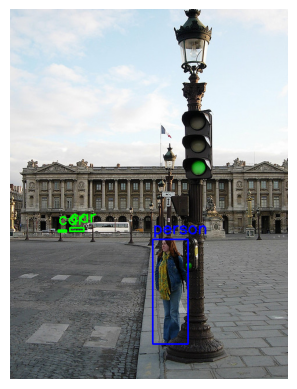

In [3]:
# Importar bibliotecas necessárias
import os
import json
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Baixar e descompactar as imagens de validação
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d ./coco

# Baixar e descompactar as anotações
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./coco

# Definir o caminho das anotações e do subconjunto
dataDir = './coco'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'
coco = COCO(annFile)

# Função para baixar, visualizar e rotular imagens
def process_coco_image(coco, dataDir, dataType):
    # Carregar IDs de imagens com categorias específicas
    catIds = coco.getCatIds(catNms=['person', 'car'])
    imgIds = coco.getImgIds(catIds=catIds)
    img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

    # Baixar a imagem
    img_data = requests.get(img['coco_url']).content
    with open(f"{dataDir}/{dataType}/{img['file_name']}", 'wb') as handler:
        handler.write(img_data)

    # Ler a imagem
    image = cv2.imread(f"{dataDir}/{dataType}/{img['file_name']}")

    # Obter as anotações da imagem
    annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Filtrar anotações para incluir apenas "person" e "car"
    anns = [ann for ann in anns if ann['category_id'] in catIds]

    # Definir as cores para as classes
    colors = {'person': (255, 0, 0), 'car': (0, 255, 0)}

    # Desenhar as caixas delimitadoras e os nomes das classes na imagem
    for ann in anns:
        bbox = ann['bbox']
        category_name = coco.loadCats(ann['category_id'])[0]['name']
        color = colors[category_name]
        x, y, w, h = map(int, bbox)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, category_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Exibir a imagem rotulada
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Processar e visualizar uma imagem com rótulos específicos
process_coco_image(coco, dataDir, dataType)

--2025-01-25 03:05:34--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.142.41, 16.182.68.73, 3.5.29.191, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.142.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip.2’

val2017.zip.2       100%[===================>] 777.80M  96.4MB/s    in 8.2s    

2025-01-25 03:05:43 (95.1 MB/s) - ‘val2017.zip.2’ saved [815585330/815585330]

Archive:  val2017.zip
replace ./coco/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2025-01-25 03:05:58--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.94.68, 54.231.232.97, 52.217.137.17, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.94.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Leng

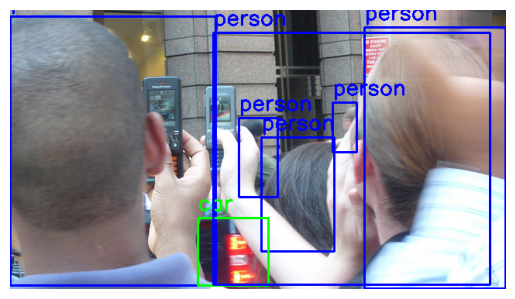

In [4]:
# Importar bibliotecas necessárias
import os
import json
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Baixar e descompactar as imagens de validação
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d ./coco

# Baixar e descompactar as anotações
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./coco

# Definir o caminho das anotações e do subconjunto
dataDir = './coco'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'
coco = COCO(annFile)

# Função para baixar, visualizar e rotular imagens
def process_coco_image(coco, dataDir, dataType):
    # Carregar IDs de imagens com categorias específicas
    catIds = coco.getCatIds(catNms=['person', 'car'])
    imgIds = coco.getImgIds(catIds=catIds)
    img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

    # Baixar a imagem
    img_data = requests.get(img['coco_url']).content
    with open(f"{dataDir}/{dataType}/{img['file_name']}", 'wb') as handler:
        handler.write(img_data)

    # Ler a imagem
    image = cv2.imread(f"{dataDir}/{dataType}/{img['file_name']}")

    # Obter as anotações da imagem
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Filtrar anotações para incluir apenas "person" e "car"
    anns = [ann for ann in anns if ann['category_id'] in catIds]

    # Definir as cores para as classes
    colors = {'person': (255, 0, 0), 'car': (0, 255, 0)}

    # Desenhar as caixas delimitadoras e os nomes das classes na imagem
    for ann in anns:
        bbox = ann['bbox']
        category_name = coco.loadCats(ann['category_id'])[0]['name']
        color = colors[category_name]
        x, y, w, h = map(int, bbox)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, category_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Exibir a imagem rotulada
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Processar e visualizar uma imagem com rótulos específicos
process_coco_image(coco, dataDir, dataType)

--2025-01-25 03:07:38--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.24.167, 54.231.160.49, 54.231.162.225, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.24.167|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip.3’

val2017.zip.3       100%[===================>] 777.80M  98.3MB/s    in 8.1s    

2025-01-25 03:07:46 (95.7 MB/s) - ‘val2017.zip.3’ saved [815585330/815585330]

Archive:  val2017.zip
replace ./coco/val2017/000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: --2025-01-25 03:08:06--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.41.196, 16.15.192.64, 16.182.39.49, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.41.196|:80... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

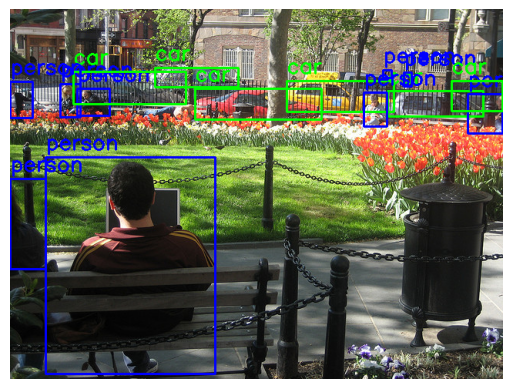

In [5]:
# Importar bibliotecas necessárias
import os
import json
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Baixar e descompactar as imagens de validação
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip -d ./coco

# Baixar e descompactar as anotações
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip -d ./coco

# Definir o caminho das anotações e do subconjunto
dataDir = './coco'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/instances_{dataType}.json'
coco = COCO(annFile)

# Função para baixar, visualizar e rotular imagens
def process_coco_image(coco, dataDir, dataType):
    # Carregar IDs de imagens com categorias específicas
    catIds = coco.getCatIds(catNms=['person', 'car'])
    imgIds = coco.getImgIds(catIds=catIds)
    img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]

    # Baixar a imagem
    img_data = requests.get(img['coco_url']).content
    with open(f"{dataDir}/{dataType}/{img['file_name']}", 'wb') as handler:
        handler.write(img_data)

    # Ler a imagem
    image = cv2.imread(f"{dataDir}/{dataType}/{img['file_name']}")

    # Obter as anotações da imagem
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)

    # Filtrar anotações para incluir apenas "person" e "car"
    anns = [ann for ann in anns if ann['category_id'] in catIds]

    # Definir as cores para as classes
    colors = {'person': (255, 0, 0), 'car': (0, 255, 0)}

    # Desenhar as caixas delimitadoras e os nomes das classes na imagem
    for ann in anns:
        bbox = ann['bbox']
        category_name = coco.loadCats(ann['category_id'])[0]['name']
        color = colors.get(category_name, (0, 255, 255))  # Cor padrão para outras classes
        x, y, w, h = map(int, bbox)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, category_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Exibir a imagem rotulada
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Processar e visualizar uma imagem com rótulos específicos
process_coco_image(coco, dataDir, dataType)